### dem download and preprocessing
1. srtm dem downloading;
2. srtm dem processing, including dem mosaic and downsampling.


In [ ]:
import matplotlib.pyplot as plt
from pyrsimg import readTiff
import geopandas as gpd
from glob import glob
from utils.get_dem import get_dem


In [48]:
path_vec_yunnan = 'data/yunnan-vec/yunnan_boundary.geojson'
yunnan_vec_gpd = gpd.read_file(path_vec_yunnan)
yunnan_vec_gpd


,name,gb,geometry
0,云南省,156530000,"MULTIPOLYGON (((99.11815 29.19243, 99.10934 29..."


#### Download SRTM DEM

In [ ]:
# hma_bounds = ([75, 76, 34, 35])  ### west, east, south, north
lonmin, lonmax = 95, 110
latmin, latmax = 20, 30
for lon in range(lonmin, lonmax, 5):    
    for lat in range(latmin, latmax, 5):        
        dem_out = 'data/dem/srtm_tiles/SRTMGL3_{}_{}.tif'.format(lon, lat)
        region = [lon-0.1, lon+5+0.1, lat-0.1, lat+5+0.1]
        print('Ouput dem:', dem_out, 'Region:',  region)
        get_dem(demtype='SRTMGL3', bounds=region, path_out=dem_out)


Ouput dem: data/dem/srtm_tiles/SRTMGL3_95_20.tif Region: [94.9, 100.1, 19.9, 25.1]
!!Output file has been existed.
Ouput dem: data/dem/srtm_tiles/SRTMGL3_95_25.tif Region: [94.9, 100.1, 24.9, 30.1]
!!Output file has been existed.
Ouput dem: data/dem/srtm_tiles/SRTMGL3_100_20.tif Region: [99.9, 105.1, 19.9, 25.1]
!!Output file has been existed.
Ouput dem: data/dem/srtm_tiles/SRTMGL3_100_25.tif Region: [99.9, 105.1, 24.9, 30.1]
!!Output file has been existed.
Ouput dem: data/dem/srtm_tiles/SRTMGL3_105_20.tif Region: [104.9, 110.1, 19.9, 25.1]
!!Output file has been existed.
Ouput dem: data/dem/srtm_tiles/SRTMGL3_105_25.tif Region: [104.9, 110.1, 24.9, 30.1]
!!Output file has been existed.


#### Mosaic

In [ ]:
paths_dem_ls = glob('data/dem/srtm_tiles/*')
paths_dem_str = ''
for path in paths_dem_ls:
    paths_dem_str = paths_dem_str + path + ' '
print(paths_dem_str)


data/dem/srtm_tiles/SRTMGL3_100_25.tif data/dem/srtm_tiles/SRTMGL3_100_20.tif data/dem/srtm_tiles/SRTMGL3_95_20.tif.aux.xml data/dem/srtm_tiles/SRTMGL3_95_25.tif data/dem/srtm_tiles/SRTMGL3_95_20.tif data/dem/srtm_tiles/SRTMGL3_100_20.tif.aux.xml data/dem/srtm_tiles/SRTMGL3_105_20.tif data/dem/srtm_tiles/SRTMGL3_105_20.tif.aux.xml data/dem/srtm_tiles/SRTMGL3_105_25.tif data/dem/srtm_tiles/SRTMGL3_105_25.tif.aux.xml 


In [ ]:
paths_dem_ls = glob('data/dem/srtm_tiles/*')
out_file = 'data/dem/hma_SRTMGL3.tif'
!gdal_merge.py -init 0 -co BIGTIFF=YES -o $out_file $paths_dem_str


ERROR 4: `data/dem/srtm_tiles/SRTMGL3_95_20.tif.aux.xml' not recognized as a supported file format.
ERROR 4: `data/dem/srtm_tiles/SRTMGL3_100_20.tif.aux.xml' not recognized as a supported file format.
ERROR 4: `data/dem/srtm_tiles/SRTMGL3_105_20.tif.aux.xml' not recognized as a supported file format.
ERROR 4: `data/dem/srtm_tiles/SRTMGL3_105_25.tif.aux.xml' not recognized as a supported file format.
0...10...20...30...40...50...60...70...80...90...100 - done.


#### Downsampling


In [ ]:
# # # ## downsampling
path_srtm = 'data/dem/hma_SRTMGL3.tif'
path_srtm_down = 'data/dem/hma_SRTMGL3_down.tif' 
!gdal_translate -outsize 30% 30% -r average $path_srtm $path_srtm_down


#### Check the dem image.
The better visualization can be found in visual/study_area.ipynb


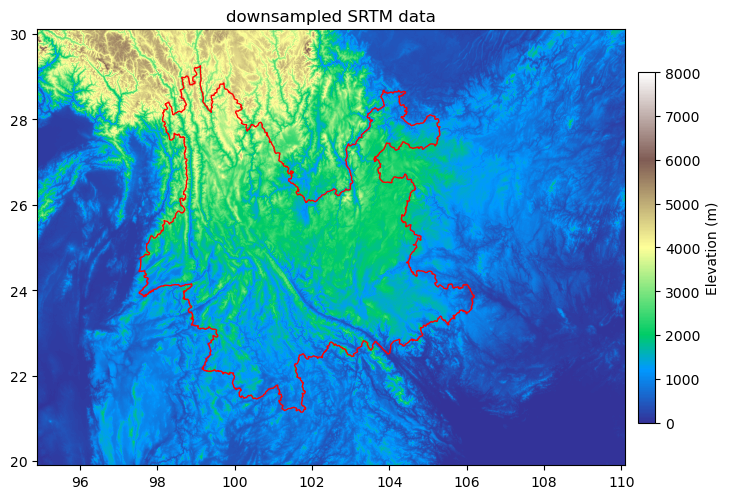

In [ ]:
## Check
srtm_down = readTiff(path_srtm_down)
cmap = plt.cm.terrain
fig, ax = plt.subplots(1,1, figsize=(8, 7))
ax.set_title('downsampled SRTM data')
im = ax.imshow(srtm_down.array, cmap=cmap, clim=[0, 8000], alpha=1, extent=srtm_down.geoextent)
yunnan_vec_gpd.plot(ax=ax, facecolor='None', edgecolor='red', lw=1)
plt.colorbar(im, ax=ax, fraction=0.0320, pad=0.02, label='Elevation (m)', shrink=0.65)
